## **Learning Rate Schedule** : برنامه ریزی نرخ یادگیری

یک تکنیک در آموزش مدل‌های یادگیری عمیق است که نرخ یادگیری را در طول فرآیند آموزش به صورت پویا تنظیم می‌کند تا :

بهبود همگرایی : کمک می‌کند مدل سریع‌تر به بهینه‌ی سراسری  برسد

پایداری آموزش : از نوسانات زیاد در اوایل آموزش جلوگیری می‌کند

دقت نهایی بهتر : با کاهش نرخ یادگیری در مراحل پایانی، مدل بهینه‌ تر می‌شود


#### ⁉ **lr_schedule** دلیل نیاز به

نرخ یادگیری ثابت ممکن است باعث شود :    
- در اوایل آموزش، مدل به آرامی همگرا شود
- در مراحل پایانی، مدل حول بهینه نوسان کند


###  PyTorch در **lr_scheduler**  انواع  (torch.optim.lr_scheduler)

#### 1. CosineAnnealingLR:

- نرخ یادگیری را به صورت کسینوسی کاهش می‌دهد

- مناسب برای تمرین‌های طولانی (مانند آموزش مدل‌های بزرگ)

- پرکاربرد ترین روش است

مثال استفاده :

In [ ]:
# آپدیت نرخ یادگیری در هر ایپاک
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
for epoch in range(100):
    train(...)
    scheduler.step()

#### 2.StepLR:

 -  را در هر گام مشخصی کاهش می‌دهد RL (مثلاً هر ۳۰ ایپاک)

مثال :    


In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

#### 3.ReduceLROnPlateau:

  -  بهبود نیافت، نرخ یادگیری را کاهش می‌دهد Validation اگر خطای
  
مثال :

In [ ]:
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)
  scheduler.step(val_loss)  # epoch پس از هر


#### 4.OneCycleLR:

  - ترکیب افزایش و کاهش نره یادگیری به صورت هوشمند (برای آموزش سریع‌تر)

مثال :  

In [ ]:
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, total_steps=100)

---
## **lr_schedule**

این متد یک ترکیب از دو روش برای تنظیم نرخ یادگیری است

1. **Warmup** : (گرم کردن) در ابتدای آموزش

2. کاهش کسینوسی (**Cosine Decay**) : Warmup پس از مرحله

روش کار به این شکل است که ابتدا به شکل خطی نرخ یادگیری زیاد میشود, سپس به شکل منحنی کسینوسی ,به صورت نرم و تدریجی کاهش میابد

#### 1.**Warmup** (گرم کردن)

In [ ]:
if step < cfg.warmup:
    return cfg.lr * (step + 1) / max(1, cfg.warmup)

توضیحات :    

باشد, نرخ یادگیری به صورتر خطی افزایش میابدcfg.warmup کمتر از step اگر


#### 2. مرحله کاهش کسینوسی (**Cosine Decay**)

In [ ]:
progress = (step - cfg.warmup) / max(1, cfg.steps - cfg.warmup)
min_lr = cfg.lr * 0.1     # حداقل LR = 10% مقدار اصلی
return min_lr + 0.5 * (cfg.lr - min_lr) * (1 + math.cos(math.pi * min(progress, 1.0)))

warmup هدف : کاهش نرم و تدریجی نرخ یادگیری پس از

است CosineAnnealingLR فرمول کاهش کسینوسی مشابه


---
## **CosineAnnealingLR**

##### CosineAnnealingLR فرمول

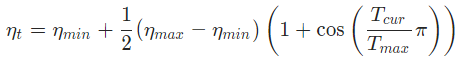


η_max: نرخ یادگیری اولیه (initial_lr)

η_min: حداقل نرخ یادگیری (eta_min، معمولاً 0 یا مقدار بسیار کوچک)

T_cur: گام فعلی (تعداد به‌روزرسانی‌های انجام‌شده)

T_max: کل گام‌های یک سیکل (معمولاً برابر تعداد epochها)



#### ▶ نحوه تغییر نرخ یادگیری در طول زمان

1. شروع میشود η_max نرخ یادگیری از

2. به تدریج با منحنی کسینوسی کاهش می‌یابد

3. میرسد η_min به T_max در

4. برمیگردد η_max سپس دوباره به ( اگر سیکل تکرار شود)

In [ ]:
# مثال
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

# 1. تعریف مدل و بهینه‌ساز
model = torch.nn.Linear(10, 2)
optimizer = optim.SGD(model.parameters(), lr=0.1)  # LR اولیه = 0.1

# 2. تعریف CosineAnnealingLR
scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0.001)

# 3. حلقه آموزش
for epoch in range(100):
    # آموزش مدل...
    optimizer.step()
    scheduler.step()  # به‌روزرسانی LR در هر epoch

    # چاپ LR فعلی
    print(f"Epoch {epoch}, LR = {optimizer.param_groups[0]['lr']}")

خروجی :    

در ابتدای آموزش، نرخ یادگیری نزدیک به 0.1 است

در انتهای آموزش، نرخ یادگیری به 0.001 کاهش می‌یابد

تغییرات نرخ یادگیری به صورت صاف و کسینوسی است (نه ناگهانی مثل StepLR)